# 0. 라이브러리 불러오기 및 세팅

In [6]:
from dotenv import load_dotenv
import os
from openai import OpenAI
from IPython.display import Image
import urllib
import base64
import requests


In [5]:
# ".env" 파일을 생성해야함
# .env 파일 로드
load_dotenv()

# 환경 변수에서 API Key 읽기
api_key = os.getenv("OPENAI_API_KEY")

# OpenAI API Key 설정
OpenAI.api_key = api_key

print(api_key) # 이게 정상적으로 출력이 되어야함 "sk-..."

sk-ekdTlFH2Otil74rlVq5DFXbgR6FbBYPGtL0pZeoQ4zT3BlbkFJS4klQ6lXryIkiJy3-Ql7E72STpoHH3bgkH-AP9Ji4A


# 1. Dall-e 기본 세팅

In [3]:
import os
# png만 들고오기
png_set= []
images = os.listdir('00_ref')
png_images = [image for image in images if image.endswith('.png')]
for image in png_images:
    image = os.path.join('00_ref', image)
    png_set.append(image)
png_set[:5]

['00_ref\\027c9aefa6463e22961e63105e01442d.png',
 '00_ref\\04ec15606e226815421b725000cd965a.png',
 '00_ref\\0e9723598271cfcfd7fa197dccb16f21.png',
 '00_ref\\0ff16034a7cbf05a56b6f95571e21486.png',
 '00_ref\\1023f218fa1ec4266185f865ab917e87.png']

(np.float64(-0.5), np.float64(563.5), np.float64(375.5), np.float64(-0.5))

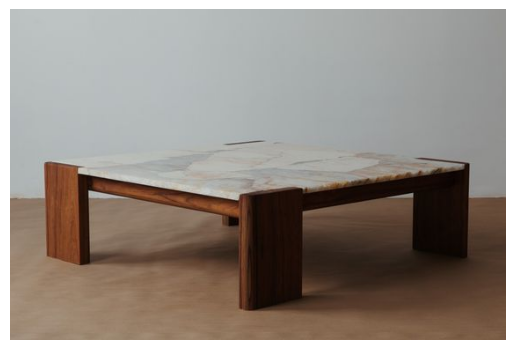

In [4]:
# 첫번째 이미지 출력
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open(png_set[4])
plt.imshow(image)
plt.axis('off')

# 2. 실행

## 2.1. Vision

In [39]:
# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

furn_nm = '73a9db79dd2e76678eb2da2f8868c793'
image_path = f'00_ref/{furn_nm}.png'

# Getting the base64 string
base64_image = encode_image(image_path)

In [40]:

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

payload = {
  "model": "gpt-4o",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What’s in this image? You are a professional furniture designer and it's your job to identify the furniture in the image in order to create a new design based on it. Please try to describe the specific color, material, and style, size of the furniture in the image."
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
          }
        }
      ]
    }
  ],
  "max_tokens": 300
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

print(response.json())

{'id': 'chatcmpl-9wWrybdWZLOicTwF9uBi9baK6S50t', 'object': 'chat.completion', 'created': 1723736402, 'model': 'gpt-4o-2024-05-13', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': "This image displays a distinctive and contemporary coffee table. Here’s a detailed description of its features:\n\n### Color:\n- The surface of the table is a bold red color, which gives it a striking and modern appearance.\n- The edges and legs are finished in black, providing a strong contrast to the red surface.\n\n### Material:\n- The table appears to be made from a sturdy material such as wood or MDF, possibly with a laminate or lacquered finish on the top surfaces to achieve the vibrant red color.\n- The legs are likely solid wood or a high-quality composite, painted or stained black.\n\n### Style:\n- The table's design is mid-century modern-inspired but with a unique and contemporary twist.\n- The shape is asymmetrical and organic, featuring smooth curves and a multi-tiered structu

In [41]:
# 프롬프트 기반으로 생성 시도 - 재현
prompt = response.json().get('choices')[0].get('message').get('content')

client = OpenAI()

furn_create = client.images.generate(
  model="dall-e-3",
  prompt= prompt ,
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = furn_create.data[0].url

In [52]:
# 프롬프트 기반으로 생성 시도 
prompt = response.json().get('choices')[0].get('message').get('content')
new_prompt = f'''This explanation is a sample furniture design.' + {prompt} + 
'--- \n And according to this design you will going to design a modern stool, with a size of that one could sit on.
Create with same color, material, and style as the sample furniture design. 
DO NOT Put any letters or numbers in the image.'''

In [54]:
client = OpenAI()

furn_create = client.images.generate(
  model="dall-e-3",
  prompt=new_prompt,
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = furn_create.data[0].url

In [55]:
Image(url=image_url)

In [56]:

# 생성된 이미지를 URL로부터 다운로드하여 저장합니다.
urllib.request.urlretrieve(image_url, f"88_output/{furn_nm}_created_2.png")

('88_output/73a9db79dd2e76678eb2da2f8868c793_created_2.png',
 <http.client.HTTPMessage at 0x210da45bc50>)